In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (25,10)

In [2]:
df_train = pd.read_csv('train.csv', sep=',', encoding='utf8')
df_test = pd.read_csv('test.csv', sep=',', encoding='utf8') 
df_train.shape, df_test.shape

((24712, 22), (16476, 21))

In [3]:
df_train.head()

,_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,df7489733b004bbe40d3d37b34f82419,54,technician,married,professional.course,unknown,no,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,905a0b9a5456ee962223033473666be3,36,services,single,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,02d69c07ec6d68e31d641edd45ce61cd,53,blue-collar,married,basic.4y,no,yes,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
3,e492fbe0cccaf67cdb5c0944dbc8a167,34,blue-collar,married,basic.9y,no,yes,yes,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,ac2dc6f5835bdea8e71dd99b65208d07,29,services,single,university.degree,no,yes,no,telephone,aug,...,1,999,0,nonexistent,-1.7,94.027,-38.3,0.890,4991.6,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 22 columns):
_id               24712 non-null object
age               24712 non-null int64
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null object
day_of_week       24712 non-null object
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null object
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64
dtypes: floa

In [5]:
df_test.head()

,_id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,66810d8e6bf2b41c880a7bc6c8a1e295,57,technician,married,high.school,no,no,yes,cellular,may,...,371,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1
1,ccac3879652b08cb8b44c1920fd93afa,55,unknown,married,unknown,unknown,yes,no,telephone,may,...,285,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
2,fcccab4d7a76f70647f015f2c84c2af8,33,blue-collar,married,basic.9y,no,no,no,cellular,may,...,52,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1
3,ed8399278c30678dab739045fa12b440,36,admin.,married,high.school,no,no,no,telephone,jun,...,355,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1
4,1d4d62ac5cabcb48bac7112813f290cb,27,housemaid,married,high.school,no,yes,no,cellular,jul,...,189,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 21 columns):
_id               16476 non-null object
age               16476 non-null int64
job               16476 non-null object
marital           16476 non-null object
education         16476 non-null object
default           16476 non-null object
housing           16476 non-null object
loan              16476 non-null object
contact           16476 non-null object
month             16476 non-null object
day_of_week       16476 non-null object
duration          16476 non-null int64
campaign          16476 non-null int64
pdays             16476 non-null int64
previous          16476 non-null int64
poutcome          16476 non-null object
emp.var.rate      16476 non-null float64
cons.price.idx    16476 non-null float64
cons.conf.idx     16476 non-null float64
euribor3m         16476 non-null float64
nr.employed       16476 non-null float64
dtypes: float64(5), int64(5), object(11)
memory usa

In [7]:
df_train = df_train.drop(['_id'], axis=1)
df_test = df_test.drop(['_id'], axis=1)

In [8]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

job
{'retired', 'blue-collar', 'services', 'admin.', 'management', 'entrepreneur', 'technician', 'housemaid', 'student', 'self-employed', 'unemployed', 'unknown'}


marital
{'divorced', 'unknown', 'married', 'single'}


education
{'basic.9y', 'high.school', 'illiterate', 'basic.4y', 'basic.6y', 'professional.course', 'university.degree', 'unknown'}


default
{'yes', 'unknown', 'no'}


housing
{'yes', 'unknown', 'no'}


loan
{'yes', 'unknown', 'no'}


contact
{'cellular', 'telephone'}


month
{'may', 'aug', 'jun', 'dec', 'sep', 'nov', 'apr', 'jul', 'oct', 'mar'}


day_of_week
{'fri', 'thu', 'wed', 'mon', 'tue'}


poutcome
{'failure', 'nonexistent', 'success'}




In [9]:
def my_counter(column):
    x = 0
    for value in df_train[column]:
        if value == 'unknown':
            x+=1
    return x

In [10]:
print(my_counter('marital'))
print(my_counter('housing'))
print(my_counter('loan'))

45
622
622


In [11]:
marital = df_train.pivot_table('target', ['marital'], aggfunc='mean')
marital

,target
marital,
divorced,0.105626
married,0.101338
single,0.139611
unknown,0.133333


In [12]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    df_output = df_output.drop([
        'day_of_week',
        'month',
        'euribor3m',  
        'loan',
        'default', 
        'education',
        'marital',
        'job',
        'contact',
        'housing',
#         'poutcome'
    ], axis=1)    
    
#     df_output['housing'] = df_output['housing'].replace({'no': 0, 'yes': 1, 'unknown': -1})
    df_output['poutcome'] = df_output['poutcome'].replace({'failure': 0, 'success': 1, 'nonexistent': -1})
#     df_output.loc[:, ['default', 'housing', 'loan']] = \
#     df_output.loc[:, ['default', 'housing', 'loan']].replace({'no': 0, 'yes': 1, 'unknown': -1})

#     # средний таргет по каждому признаку
#     df_output['education'] = df_output['education'].replace({
#         'basic.4y': 0.104637,
#         'basic.6y': 0.080057,
#         'basic.9y': 0.079102,
#         'high.school': 0.105804,
#         'illiterate': 0.000000,
#         'professional.course': 0.110219,
#         'university.degree': 0.141880,
#         'unknown': 0.133962
#     }) 
    
#     df_output['marital'] = df_output['marital'].replace({
#         'divorced' : 0.105626,
#         'married' : 0.101338,
#         'single' : 0.139611,
#         'unknown' : 0.133333
#     })
    
#     df_output['job'] = df_output['job'].replace({
#         'admin.': 0.131916,
#         'blue-collar': 0.071873,
#         'entrepreneur': 0.085580,
#         'housemaid': 0.098160,
#         'management': 0.115472,
#         'retired': 0.239760,
#         'self-employed': 0.102353,
#         'services': 0.079046,
#         'student': 0.301444,
#         'technician': 0.107600,
#         'unemployed': 0.144781,
#         'unknown': 0.101523
#     })  
#     df_output['contact'] = df_output['contact'].replace({'telephone': 0, 'cellular': 1})
#     df_output = pd.get_dummies(df_output, dummy_na = True,  columns=['contact'])
    
    return df_output

In [13]:
df_preproc = df_train.pipe(preproc_data)

In [14]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 11 columns):
age               24712 non-null int64
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null int64
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64
dtypes: float64(4), int64(7)
memory usage: 2.1 MB


In [15]:
df_preproc.shape

(24712, 11)

In [16]:
y = df_preproc['target']
y.shape

(24712,)

In [17]:
X = df_preproc.drop(['target'], axis=1)
X.shape

(24712, 10)

In [18]:
from sklearn.cross_validation import train_test_split

/Users/Vitalina/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from ipywidgets import interact, IntSlider
from sklearn.cross_validation import train_test_split
import subprocess
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as randint
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1
)

# Метод ближайших соседей

In [22]:
knn = Pipeline([
    ('scaler', StandardScaler()), 
    ('knn', KNeighborsClassifier())])

knn_params = {
    'knn__n_neighbors': [6],
    'knn__weights': [
        'uniform', 
#         'distance'
    ],
    'knn__algorithm': [
        'auto', 
#         'ball_tree', 
#         'kd_tree', 
#         'brute'
    ],
    'knn__leaf_size': range(10, 50, 5)  
}

knn_grid = GridSearchCV(
    knn, 
    knn_params,
    cv=3, 
    n_jobs=-1,
    verbose=True
)

knn_grid.fit(X_train, y_train)
knn_grid.best_params_, knn_grid.best_score_, knn_grid.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    8.8s finished


({'knn__algorithm': 'auto',
  'knn__leaf_size': 10,
  'knn__n_neighbors': 6,
  'knn__weights': 'uniform'},
 0.9031025179856115,
 Pipeline(memory=None,
      steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=6, p=2,
            weights='uniform'))]))

In [23]:
knn = knn_grid.best_estimator_
knn_predict = knn.predict(X_test)
knn_predict_proba = knn.predict_proba(X_test, )
roc_auc_score(y_test, knn_predict_proba[:, 1])

0.8795501332660755

# Дерево

In [24]:
dtc = DecisionTreeClassifier()

dtc_param = {
    'criterion': ['gini', 'entropy'], # мера неопределености
    'max_depth': range(3, 100), # максимальная глубина от 3х до 5 равномерное
    'min_samples_leaf': range(2, 20), # минимальное кол-во объектов в решине дерева, 
    # достаточное для дробления на части
    'class_weight': [None, 'balanced'] # вес классов (взвешиваем пустые значения)
} 

dtc_grid = RandomizedSearchCV(
    dtc, 
    param_distributions=dtc_param, # распредление параметров, заданных в словаре
    n_iter=400, # 400 переборов
    n_jobs=-1, # чтобы всё считалось в несколько потоков
    cv=5, 
    scoring='roc_auc', # показатель качества у нас рок аук 
    random_state=42
) # вербоус можно указать чтобы писалось в лог

dtc_grid.fit(X_train, y_train)
dtc_grid.best_params_, dtc_grid.best_score_, dtc_grid.best_estimator_

({'min_samples_leaf': 14,
  'max_depth': 6,
  'criterion': 'entropy',
  'class_weight': 'balanced'},
 0.936102893714105,
 DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
             max_depth=6, max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=14, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'))

In [25]:
dtc = dtc_grid.best_estimator_
dtc_predict = dtc.predict(X_test)
dtc_predict_proba = dtc.predict_proba(X_test, )
roc_auc_score(y_test, dtc_predict_proba[:, 1])

# удалим euribor3m из-за кореляции 0.9258822284840846 
# если удалим nr.employed из-за той же кореляции, то рокаук падает в 0.920...
# если добавить и перекатегоризировать месяцы, то 0.9230600577359848
# с невыкинутыми или выкинутыми'loan' и 'default' 0.9247170202007347
# снова проверка, c nr.employed 0.9329471480365978, без 0.9322729857405302
# 0.933053282576503 с невырезанным хаусингом
# Лучшая цифра в 0.943805660805078

0.9385442300220178

In [26]:
print(classification_report(y_test, dtc_predict))

             precision    recall  f1-score   support

          0       0.98      0.84      0.91      2206
          1       0.40      0.89      0.55       266

avg / total       0.92      0.84      0.87      2472



In [27]:
imp = dtc.feature_importances_
pd.Series(index=X.columns, data=imp).sort_values()

age               0.000037
previous          0.000687
poutcome          0.001585
campaign          0.001907
pdays             0.008714
cons.price.idx    0.018440
cons.conf.idx     0.053014
nr.employed       0.159451
emp.var.rate      0.230204
duration          0.525959
dtype: float64

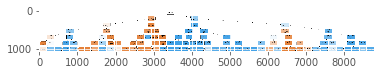

In [28]:
idx = df_preproc.columns != 'target'
feature_names = df_preproc.columns[idx]

with open('tree.dot', 'w') as fout:
    export_graphviz(
        dtc, 
        out_file=fout, 
        feature_names=feature_names, 
        class_names=['0', '1'], 
        filled=True, 
        rounded=True,  
        special_characters=True
    )
command = ["dot", "-Tpng", "tree.dot", "-o", "tree.png"]
subprocess.check_call(command)
plt.imshow(plt.imread('tree.png'))

Далее я пробовала усреднить значения, но первая модель дала на столько хоршие результаты, что в конечном итоге я использовала их

In [ ]:
def optimize(random_seed, n_iter, cv):

    model = DecisionTreeClassifier(random_state=random_seed)
#     model_params = {
#         'min_samples_leaf': range(2, 100),
#         'min_samples_split': range(10, 700),
#         'max_depth': range(3, 100),
#         'criterion': ['gini', 'entropy']
#     }
    
    model_params = {
        'min_samples_leaf': range(30, 1000),
        'min_samples_split': range(10, 1000),
        'max_depth': range(1, 100),
        'criterion': ['entropy', 'gini']
    }
       
    model_optimized = RandomizedSearchCV(
        model,
        model_params,
        n_iter=n_iter,
        cv=cv,
        n_jobs=-1,
        random_state=random_seed
    )

    model_optimized.fit(X_train, y_train)

    predictions_probability = model_optimized.predict_proba(X_test)

    roc_auc = roc_auc_score(y_test, predictions_probability[:, 1]) * 100
    print("ROCAUC for model = {:0.2f}%".format(roc_auc))
    print("Best params: {}".format(model_optimized.best_params_))

    return model_optimized

In [ ]:
models_count = 20

models = list()
for j in range(1, models_count):
    print("\nModel #{} of {}".format(j, models_count))
    new_model = optimize(j, 500, 3)
    models.append(new_model)

# предсказания для всех моделей
predictions = list()
for model in models:
    predictions.append(model.predict_proba(X_test))

# среднее
predictions_probability = np.mean(predictions, axis=0)

print(
        "ROCAUC for total predict probability = {:0.2f}%".format(
            roc_auc_score(y_test, predictions_probability[:, 1]) * 100
))

In [ ]:
df_test = pd.read_csv('test.csv', sep=',', encoding='utf8')
df_preproc_test = df_test.pipe(preproc_data).drop(['_id'], axis=1)

predictions = list()
for model in models:
    predictions.append(model.predict_proba(df_preproc_test))
predictions_probability = np.mean(predictions, axis=0)
predictions_probability

In [ ]:
model_predict = predictions_probability[:, 1]

In [ ]:
mp = list(map((lambda x: 0 if x<0.5 else 1), model_predict.tolist()))
mp

# Логистическая регрессия

In [30]:
lr = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression())
    ])

lr_params = {
    'clf__C': np.linspace(11, 100, 5),
    'clf__penalty': [
#         'l1',
        'l2'
    ],
    'clf__solver': [
        'newton-cg', 
        'liblinear', 
#         'saga', 
#         'sag', 
#         'lbfgs'
    ]
}
lr_grid = GridSearchCV(
    lr, 
    lr_params,
    cv=5, 
    n_jobs=-1,
    verbose=True
)
lr_grid.fit(X_train, y_train)
lr_grid.best_params_, lr_grid.best_score_, lr_grid.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.7s finished


({'clf__C': 11.0, 'clf__penalty': 'l2', 'clf__solver': 'newton-cg'},
 0.9084082733812949,
 Pipeline(memory=None,
      steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=11.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
           verbose=0, warm_start=False))]))

In [31]:
lr = lr_grid.best_estimator_
lr_predict = lr.predict(X_test)
lr_predict_proba = lr.predict_proba(X_test) 
roc_auc_score(y_test, lr_predict_proba[:,1])

0.9228130389436874

# Графики для всех моделей

roc_auc = 0.880
roc_auc = 0.939
roc_auc = 0.923


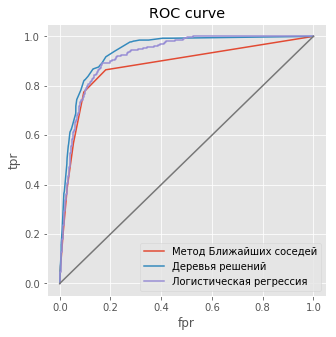

In [32]:
fpr_knn, tpr_knn, th_knn = roc_curve(y_test, knn_predict_proba[:,1])
fpr_dtc, tpr_dtc, th_dtc = roc_curve(y_test, dtc_predict_proba[:,1])
fpr_lr, tpr_lr, th_lr = roc_curve(y_test, lr_predict_proba[:,1])

plt.figure(figsize=(5,5))
plt.plot(fpr_knn, tpr_knn, label = 'Метод Ближайших соседей')
plt.plot(fpr_dtc, tpr_dtc, label = 'Деревья решений')
plt.plot(fpr_lr, tpr_lr, label = 'Логистическая регрессия')
plt.plot([0,1],[0,1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.legend()

print('roc_auc = {:.3f}'.format(roc_auc_score(y_test, knn_predict_proba[:,1])))
print('roc_auc = {:.3f}'.format(roc_auc_score(y_test, dtc_predict_proba[:,1])))
print('roc_auc = {:.3f}'.format(roc_auc_score(y_test, lr_predict_proba[:,1])))

In [46]:
df_test = pd.read_csv('test.csv', sep=',', encoding='utf8')
df_preproc_test = df_test.pipe(preproc_data)
model_predict = dtc.predict(df_preproc_test.drop(['_id'], axis=1))

In [47]:
df_test['target'] = model_predict

array([0, 0, 0, ..., 0, 0, 0])

In [112]:
model_for_file = pd.DataFrame(columns=['_id', 'target'])

model_for_file['_id'] = df_test['_id']
model_for_file['target'] = df_test['target']
model_for_file

In [ ]:
import csv
model_for_file.to_csv('predict_01.csv', index = False)